In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA as sklearn_pca
from sklearn.random_projection import johnson_lindenstrauss_min_dim as mindim
from sklearn.random_projection import GaussianRandomProjection as GRP
from sklearn.random_projection import SparseRandomProjection as SRP

In [2]:
def generate_data(n, dims):
    centres = [-10, 10]
    alpha = 150
    vectors = []

    for c in centres:
        for i in range(int(n / len(centres))):
            vectors.append(np.random.normal(c, alpha, dims))

    df = pd.DataFrame(vectors)
    print('generated data ' + str(df.shape))
    return df

In [4]:
def get_average_distances(data):
    dense_distance_matrix = pdist(data, 'minkowski', p=2.)
    # print('distances info for minkowski(2) metric:')
    all_distances = pd.Series(dense_distance_matrix)
    # print(all_distances.describe())
    return all_distances.mean()

In [10]:
# assumes only 2 classes
def plot_pca(data, title):
    class_size = int(len(data) / 2)
    pca = sklearn_pca(n_components=2)
    result = pca.fit_transform(data)

    ax = pd.DataFrame(result[0:class_size]) \
        .plot(kind='scatter', x=0, y=1, color='red')
    pd.DataFrame(result[class_size:len(data)]) \
        .plot(kind='scatter', x=0, y=1, color='blue', ax=ax)
    plt.title(title)
    plt.show()

In [6]:

def estimate_target_dim(data, eps):
    return mindim(data.shape[1], eps)

In [7]:
def gaussian_random_projection(data, dims):
    return pd.DataFrame(GRP(n_components=dims).fit_transform(data))

In [8]:
def sparse_random_projection(data, dims):
    return pd.DataFrame(SRP(n_components=dims).fit_transform(data))

generated data (1000, 10000)


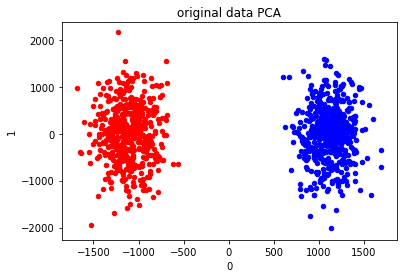

In [13]:
    original = generate_data(1000, 10000)
    # print(original)
    plot_pca(original, 'original data PCA')

In [16]:
    epsilon = 0.3
    target_dim = estimate_target_dim(original, epsilon)
    print('maximum safe dimensionality reduction from {0} with epsilon {1} is {2}'.format(original.shape[1], epsilon, target_dim))

maximum safe dimensionality reduction from 10000 with epsilon 0.3 is 1023


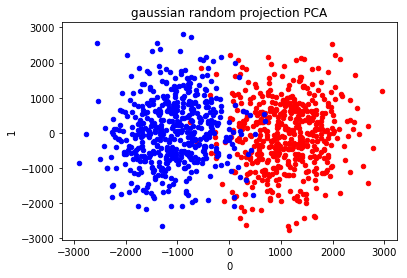

In [17]:
    grp = gaussian_random_projection(original, target_dim)
    plot_pca(grp, 'gaussian random projection PCA')

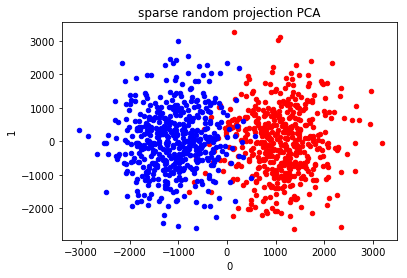

In [18]:
    srp = sparse_random_projection(original, target_dim)
    plot_pca(srp, 'sparse random projection PCA')

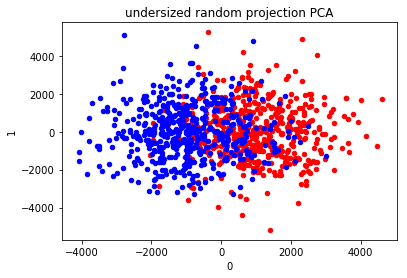

In [20]:
    undersized_srp = sparse_random_projection(original, int(target_dim / 4))
    plot_pca(undersized_srp, 'undersized random projection PCA')

In [21]:
    # TODO: policzyc macierze odleglosci i porownac blad teoretyczny (epsilon) z praktycznym dla roznych konfiguracji